## Importing Librariess

In [15]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Reading Data

In [16]:
df = pd.read_csv(r"C:\Users\saeid\OneDrive\Desktop\ML with Py\Projects\Customer.csv")
df=pd.DataFrame(df)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Cleansing

In [17]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'Freqency')

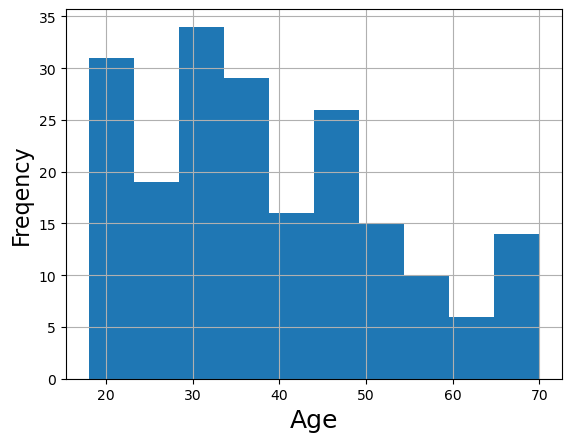

In [35]:
df.Age.hist()
plt.xlabel('Age', fontsize=18)
plt.ylabel('Freqency', fontsize=16)

Text(0, 0.5, 'Freqency')

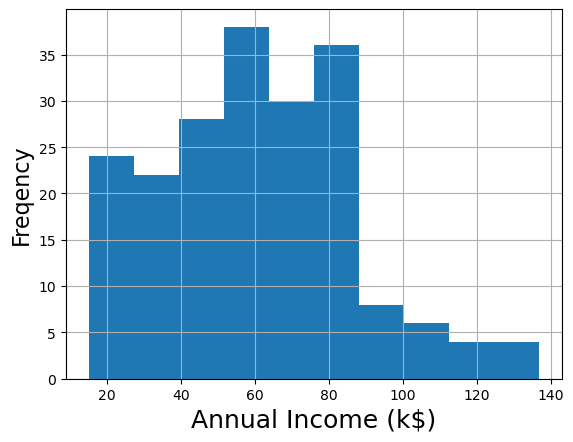

In [36]:
df['Annual Income (k$)'].hist()
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Freqency', fontsize=16)

Text(0, 0.5, 'Freqency')

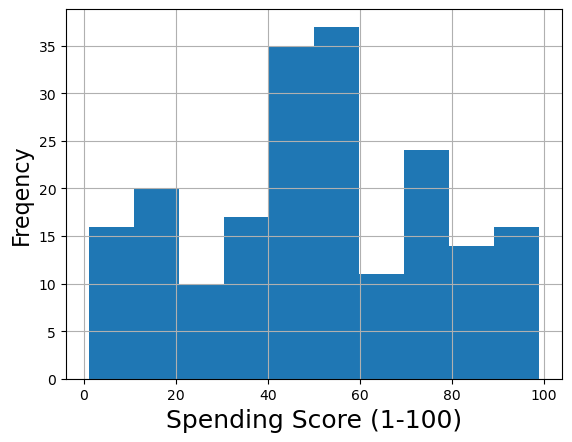

In [37]:
df['Spending Score (1-100)'].hist()
plt.xlabel('Spending Score (1-100)', fontsize=18)
plt.ylabel('Freqency', fontsize=16)

In [21]:
df.dropna(inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
df.drop_duplicates(inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data was clean

## Data Exploration

In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [24]:
df=df.drop(columns=['CustomerID'])

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df['Gender']=le.transform(df['Gender'])

In [32]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [26]:
X= preprocessing.StandardScaler().fit(df).transform(df.astype(float))

## Clustering

## K means Clustering

## Determining the best K with elbow method

In [27]:
from sklearn.cluster import KMeans
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2 + (points[i, 2] - curr_center[2]) ** 2 + (points[i, 3] - curr_center[3]) ** 2 
      
    sse.append(curr_sse)
  return sse

In [28]:
sse=calculate_WSS(X,7)


C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [29]:
sse

[800.0000000000005,
 588.8026767824932,
 476.78755441351575,
 388.50737746551033,
 331.30339369906113,
 275.8911106064892,
 236.74484773254193]

Text(0, 0.5, 'SSE')

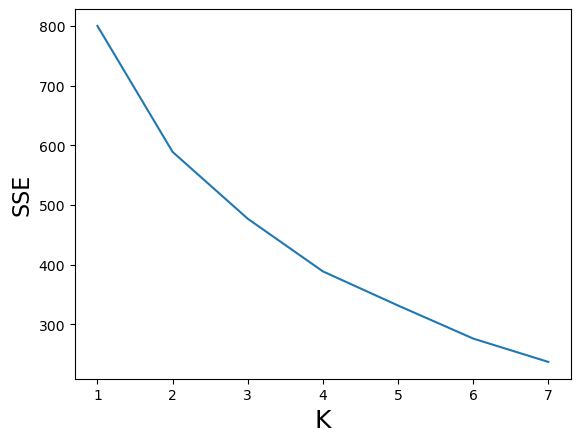

In [34]:
clusters=np.arange(1,8)
plt.plot(clusters,sse)
plt.xlabel('K', fontsize=18)
plt.ylabel('SSE', fontsize=16)

## According to the plot, the amount 5 for k seems good.

## Let's run k means clustering with k=5

In [31]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)

C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=12)

In [32]:
labels = k_means.labels_
df["KmeansClus"] = labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),KmeansClus
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,4
197,1,32,126,74,3
198,1,32,137,18,4


In [33]:
df.groupby('KmeansClus').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
KmeansClus,,,,
0,0.00000,28.392857,60.428571,68.178571
1,1.00000,57.214286,46.785714,38.714286
2,0.00000,49.325581,47.000000,38.813953
3,1.00000,28.536585,61.804878,71.097561
4,0.59375,40.218750,89.468750,17.312500


## This gave us a good sense of different clusters. 
## we should create a better relationship with the fifth cluster, because they are richer but spend little time and energy on our company and there are different methods to do this like inviting them to a cermony and making them wiser about our company.
## Also, we should have the air of clusters 1 and 4 because they put a good amount of time and energy into our company. We can do this by offering good and continuous discounts, for example once a week, so that we can maintain a good relationship with these two categories.
## For clusters 2 and 3, considering that these customers have a regular relationship with us and do not spend much energy and time in our company, it is better not to lose these customers. As they age, we can do this by offering monthly discounts on household essentials.

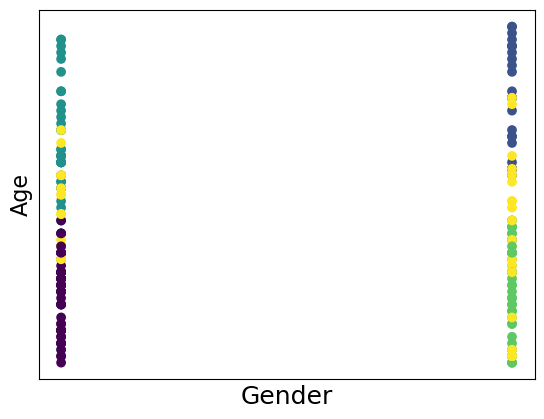

In [51]:
plt.scatter(X[:, 0], X[:, 1],  c=labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Age', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.show()

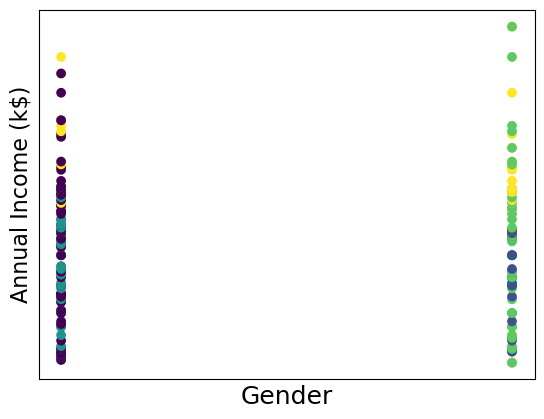

In [52]:
plt.scatter(X[:, 0], X[:, 2],  c=labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

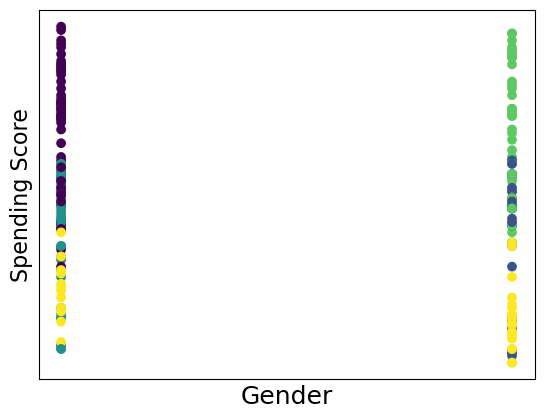

In [53]:
plt.scatter(X[:, 0], X[:, 3],  c=labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

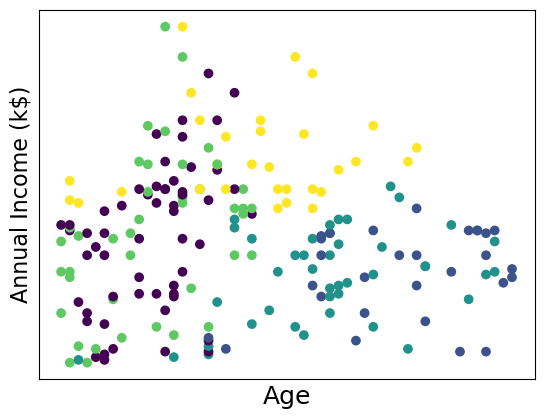

In [54]:
plt.scatter(X[:, 1], X[:, 2],  c=labels.astype(float) , alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

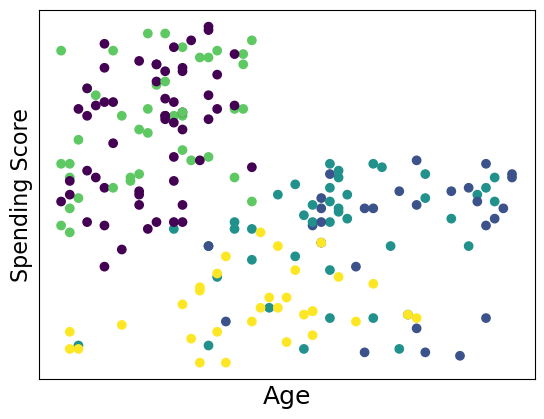

In [55]:
plt.scatter(X[:, 1], X[:, 3],  c=labels.astype(float) , alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

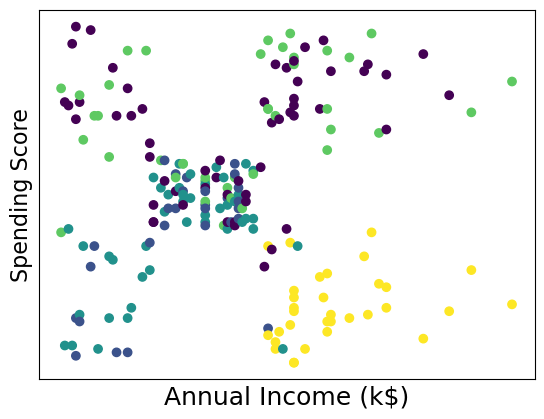

In [56]:
plt.scatter(X[:, 2], X[:, 3],  c=labels.astype(float) , alpha=1)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------------

## Hierarchical clustering

In [57]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X,X) 

In [59]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\saeid\AppData\Local\Temp\ipykernel_20840\3409742170.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


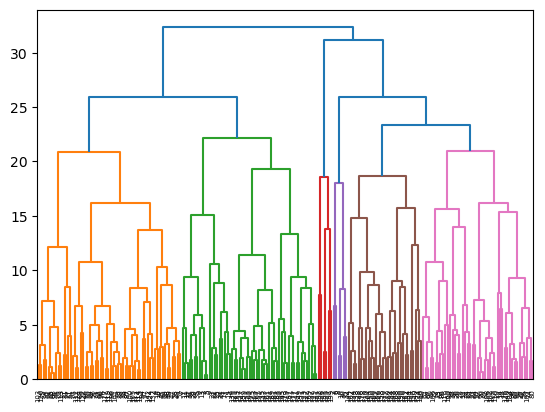

In [60]:
dendro=hierarchy.dendrogram(Z)

In [66]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

C:\Users\saeid\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=5)

In [67]:
Agglom_labels=agglom.labels_

In [68]:
df['AgglomClus']=Agglom_labels

In [69]:
df.groupby('AgglomClus').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KmeansClus
AgglomClus,,,,,
0,0.546667,49.840000,63.640000,30.853333,2.480000
1,0.454545,29.563636,61.072727,81.127273,1.363636
2,0.666667,33.333333,124.333333,58.833333,2.333333
3,0.241379,32.879310,53.431034,49.551724,1.413793
4,0.666667,49.833333,22.500000,6.166667,1.333333


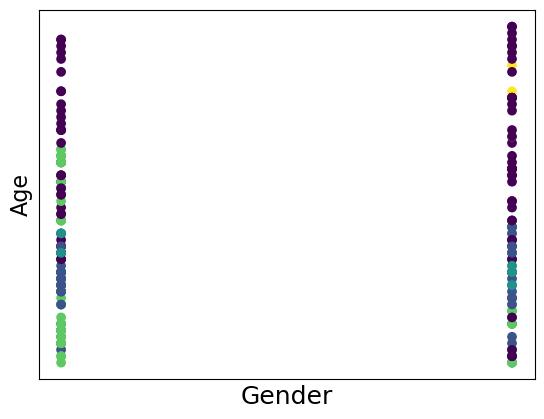

In [70]:
plt.scatter(X[:, 0], X[:, 1],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Age', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

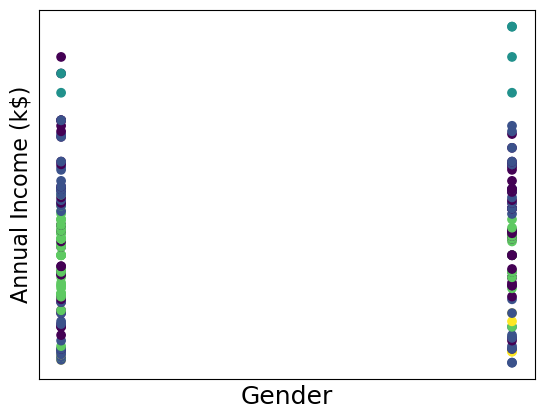

In [71]:
plt.scatter(X[:, 0], X[:, 2],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

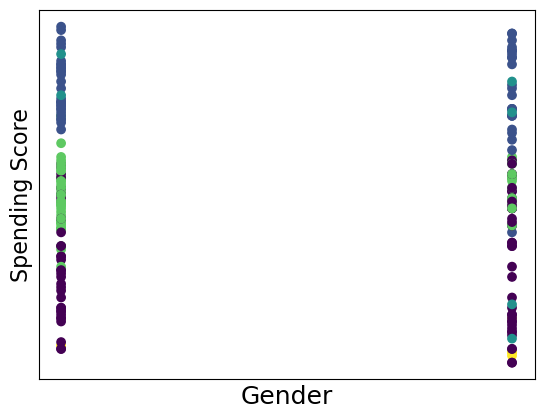

In [72]:
plt.scatter(X[:, 0], X[:, 3],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

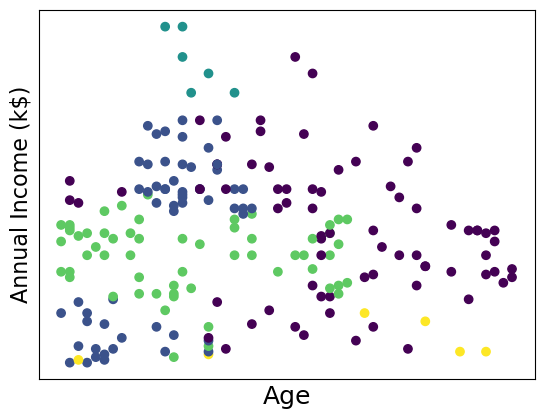

In [73]:
plt.scatter(X[:, 1], X[:, 2],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

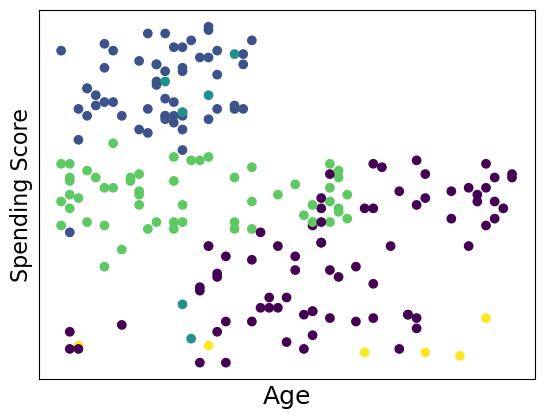

In [74]:
plt.scatter(X[:, 1], X[:, 3],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

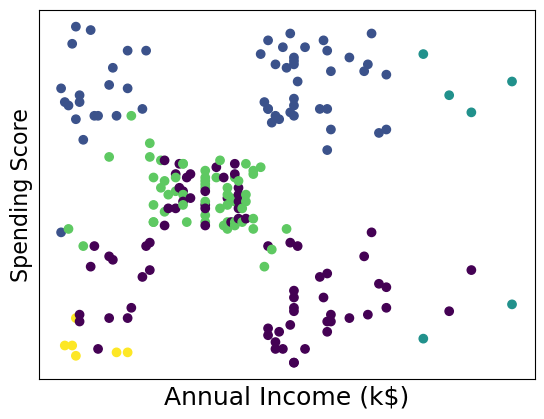

In [75]:
plt.scatter(X[:, 2], X[:, 3],  c=Agglom_labels.astype(float) , alpha=1)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------------

## DBSCAN Clustering

In [100]:
from sklearn.cluster import DBSCAN
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
DBSCANlabels = db.labels_

In [102]:
df['DBSCANClus']=DBSCANlabels
df.groupby('DBSCANClus').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KmeansClus,AgglomClus
DBSCANClus,,,,,,
-1,0.44,38.85,60.56,50.2,1.56,1.205


## Because of high dispersion of data, All of data points were clustered in outlier cluster and this is awful.